# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import json

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Function that plots charts given column names and sizes
def plotCharts(columns, fig_width, fig_length, grid_row, grid_col, plot_fn, rotate_ticks=False) :
  plt.figure(figsize=(fig_width, fig_length))
  for i, variable in enumerate(columns):
    plt.subplot(grid_row, grid_col, i + 1)
    plot_fn(variable)
    if rotate_ticks:
      plt.xticks(rotation=90)
    plt.tight_layout()
  plt.show()

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

## Loading the dataset

In [ ]:
# loading the dataset
data = pd.read_csv("/content/BankChurners.csv")

In [ ]:
df = data.copy()

## Data Overview

- Observations
  - Total ~10k records and 21 columns
  - Several object types need proper conversion
  - `Customer_Age` ranges from 26-73
  - Target variable is `Attrition_Flag`

- Sanity checks
  - `CLIENTNUM` unique field has to be dropped
  - `Customer_Age` can be grouped into bins
  - `Education_Level` and `Marital_Status` has null values

In [ ]:
# Get records and features count of data
df.shape

(10127, 21)

In [ ]:
# Get all the datatypes of features and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Get the distribution of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


In [ ]:
df.sample(n=10, random_state=1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6498,712389108,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,36,6,3,2,2570.000,2107,463.000,0.651,4058,83,0.766,0.820
9013,718388733,Existing Customer,38,F,1,College,NaN,Less than $40K,Blue,32,2,3,3,2609.000,1259,1350.000,0.871,8677,96,0.627,0.483
2053,710109633,Existing Customer,39,M,2,College,Married,$60K - $80K,Blue,31,6,3,2,9871.000,1061,8810.000,0.545,1683,34,0.478,0.107
3211,717331758,Existing Customer,44,M,4,Graduate,Married,$120K +,Blue,32,6,3,4,34516.000,2517,31999.000,0.765,4228,83,0.596,0.073
5559,709460883,Attrited Customer,38,F,2,Doctorate,Married,Less than $40K,Blue,28,5,2,4,1614.000,0,1614.000,0.609,2437,46,0.438,0.000
6106,789105183,Existing Customer,54,M,3,Post-Graduate,Single,$80K - $120K,Silver,42,3,1,2,34516.000,2488,32028.000,0.552,4401,87,0.776,0.072
4150,771342183,Attrited Customer,53,F,3,Graduate,Single,$40K - $60K,Blue,40,6,3,2,1625.000,0,1625.000,0.689,2314,43,0.433,0.000
2205,708174708,Existing Customer,38,M,4,Graduate,Married,$40K - $60K,Blue,27,6,2,4,5535.000,1276,4259.000,0.636,1764,38,0.900,0.231
4145,718076733,Existing Customer,43,M,1,Graduate,Single,$60K - $80K,Silver,31,4,3,3,25824.000,1170,24654.000,0.684,3101,73,0.780,0.045
5324,821889858,Attrited Customer,50,F,1,Doctorate,Single,abc,Blue,46,6,4,3,1970.000,1477,493.000,0.662,2493,44,0.571,0.750


In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

In [ ]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [ ]:
df['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64

In [ ]:
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64

In [ ]:
df['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [ ]:
df['Customer_Age'].nunique()

45

In [ ]:
# Print all unique customer ages
s = df['Customer_Age'].unique()
s.sort()
print(s)

[26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 73]


In [ ]:
# Remove CLIENTNUM as its unique id and doesnt add much value
df.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
# Selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()
print(len(num_col))
num_col

14


['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

## Exploratory Data Analysis (EDA)

### Summary

1. How is the total transaction amount distributed?
- Distribution
  - is right skewed
  - 75% are between `~2000-5000` and several outliers
  - A**ttrited customer has less transaction range, 75% are transacting within 800-2800.**
  - When compared to existing customers, 75% are trasacting within 900-4800.


---


2. What is the distribution of the level of education of customers?
- Distribution
  - Graduates contributes about 30% of customers
  - High School contributes 20% of customers
  - Remaining 50% is distributed with other education levels

---

3. What is the distribution of the level of income of customers?

- Distribution
  - Significant amount of customers 35% earn less than `$40K`
  - `$40k-$60k` earners are about 18% of customers
  - `80k-$120k` earners are 15%  
  - Remaining 30% of customers are other income categories


---


4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
- Existing Customers:
  - Most values are around 1, with a range from 0.5 to 1.5 and some outliers above 2.5.
  - Median near 1, IQR from 0.8 to 1.2, and several high outliers.
- Attrited Customers:
  - Values are more spread out, centered around 0.7, and range from 0.3 to 1.5 with fewer outliers.
  - Median near 0.7, IQR from 0.5 to 0.9, and fewer outliers.
- **Overall, existing customers show more consistent transaction behavior, while attrited customers exhibit more variability.**


---


5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
- Existing Customers:
  - Peaks at 1, 2, and 3 months, with fewer inactive months beyond that.
  - Median at 2 months, IQR from 1 to 3 months, and some outliers up to 6 months.
- Attrited Customers:
  - Peaks at 2 and 3 months, with fewer inactive months beyond that.
  - Median at 3 months, IQR from 2 to 3 months, and some outliers up to 5 months.
- **Overall, attrited customers tend to have a slightly higher median and more consistent months of inactivity compared to existing customers.**


---



6. What are the attributes that have a strong correlation with each other?

- Positive Correlation
  
  - Credit_Limit and Avg_Open_To_Buy has strong positive correlation. When credit limit is more, average open to buy over 12 months is
  also high, means for customers having more credit limit, they tend to under utilize the card. **bold text**

  - Total_Trans_Ct and Total_Trans_Amt are also positive and yes if the number of transactions increases the amount has to increase.

  - Months_on_book and Customer_Age are also positive, means long term customers are people who are older.

  - Avg_Utilization_Ratio and Total_Revolving_Bal are also positive, customers who tend to revolving forward the balances have more utilization.


- Negative Correlation

  - Avg_Open_To_Buy and Avg_Utilization_Ratio has strong negative correlation. When average open to buy is high, meaning under utilization, implies utilization ratio is low.

  - **Credit_Limit and Avg_Utilization_Ratio are negative. If credit limit is higher, utilization is low and this is definitely a good insight to improve upon.**

  - **Total_Relationship_Count and Total_Trans_Amt are negative. Total_Relationship_Count and Total_Trans_Ct are also negative correlated. When number of products customer has is more, the transation count and amount are low, there is room for improvement here as well.**


---



#### Segregate numerical and categorical features

In [ ]:
# Selecting numerical columns
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
print(len(numeric_features))
print(numeric_features)
# Selecting numerical columns
categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()
print(len(categorical_features))
print(categorical_features)

14
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
6
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


#### Function Definitions - Exploratory Data Analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=8)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=8,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    #print(tab1)
    #print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Numerical features - Correlation heatmap

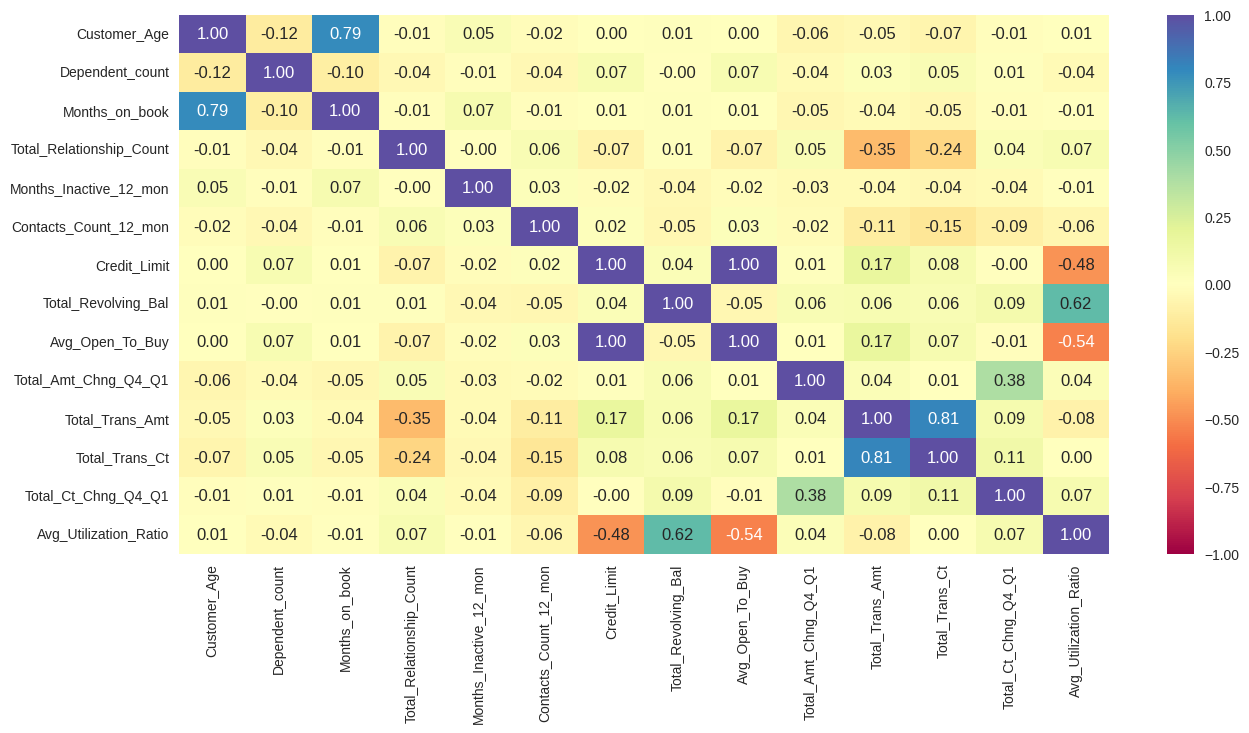

In [ ]:
# Use only numerical features for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df[numeric_features].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Numerical features - Histogram and Boxplot

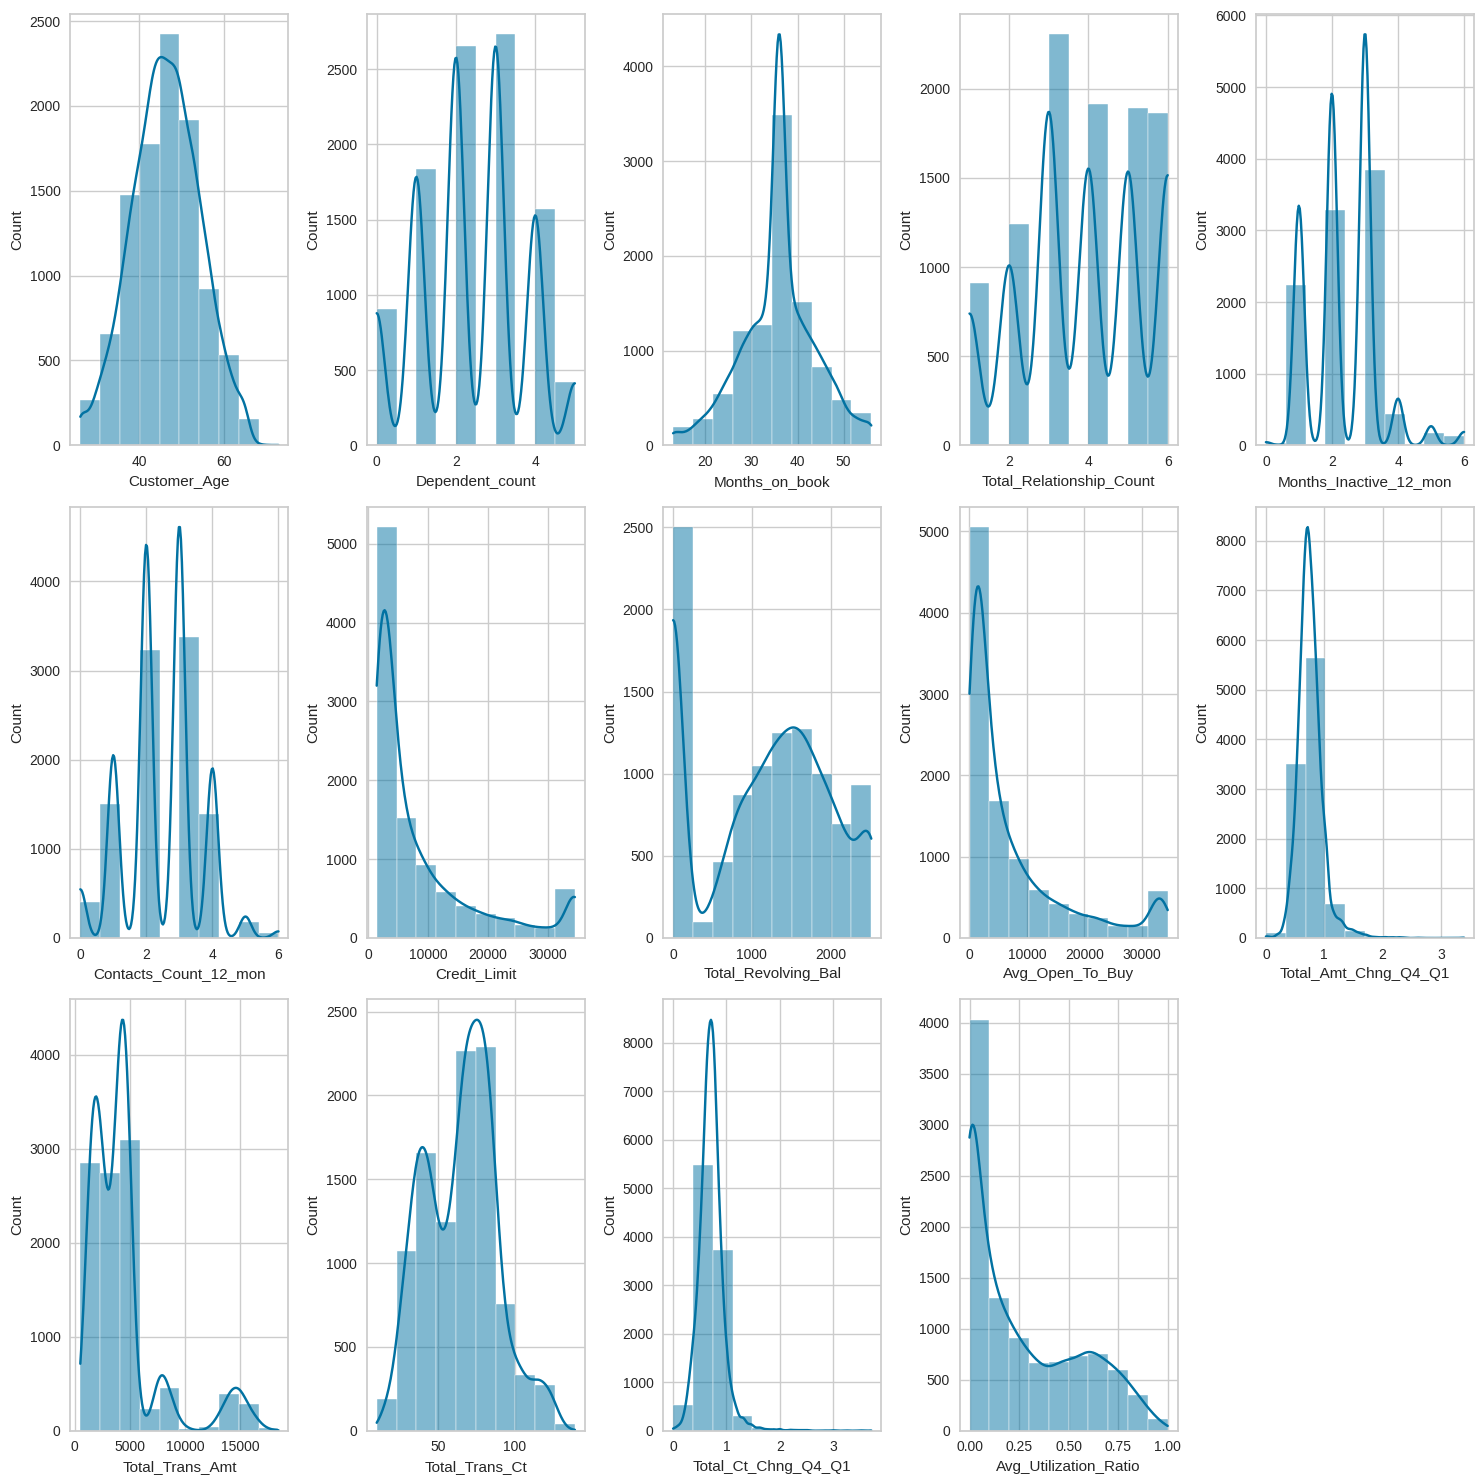

In [ ]:
# Plotting histogram with kde on all numeric columns that are meaningful
# This will provide insights on the distribution of the numerical data
plotCharts(numeric_features, 15, 15, 3, 5, lambda variable: sns.histplot(data=df, bins=10, x=variable, kde=True))

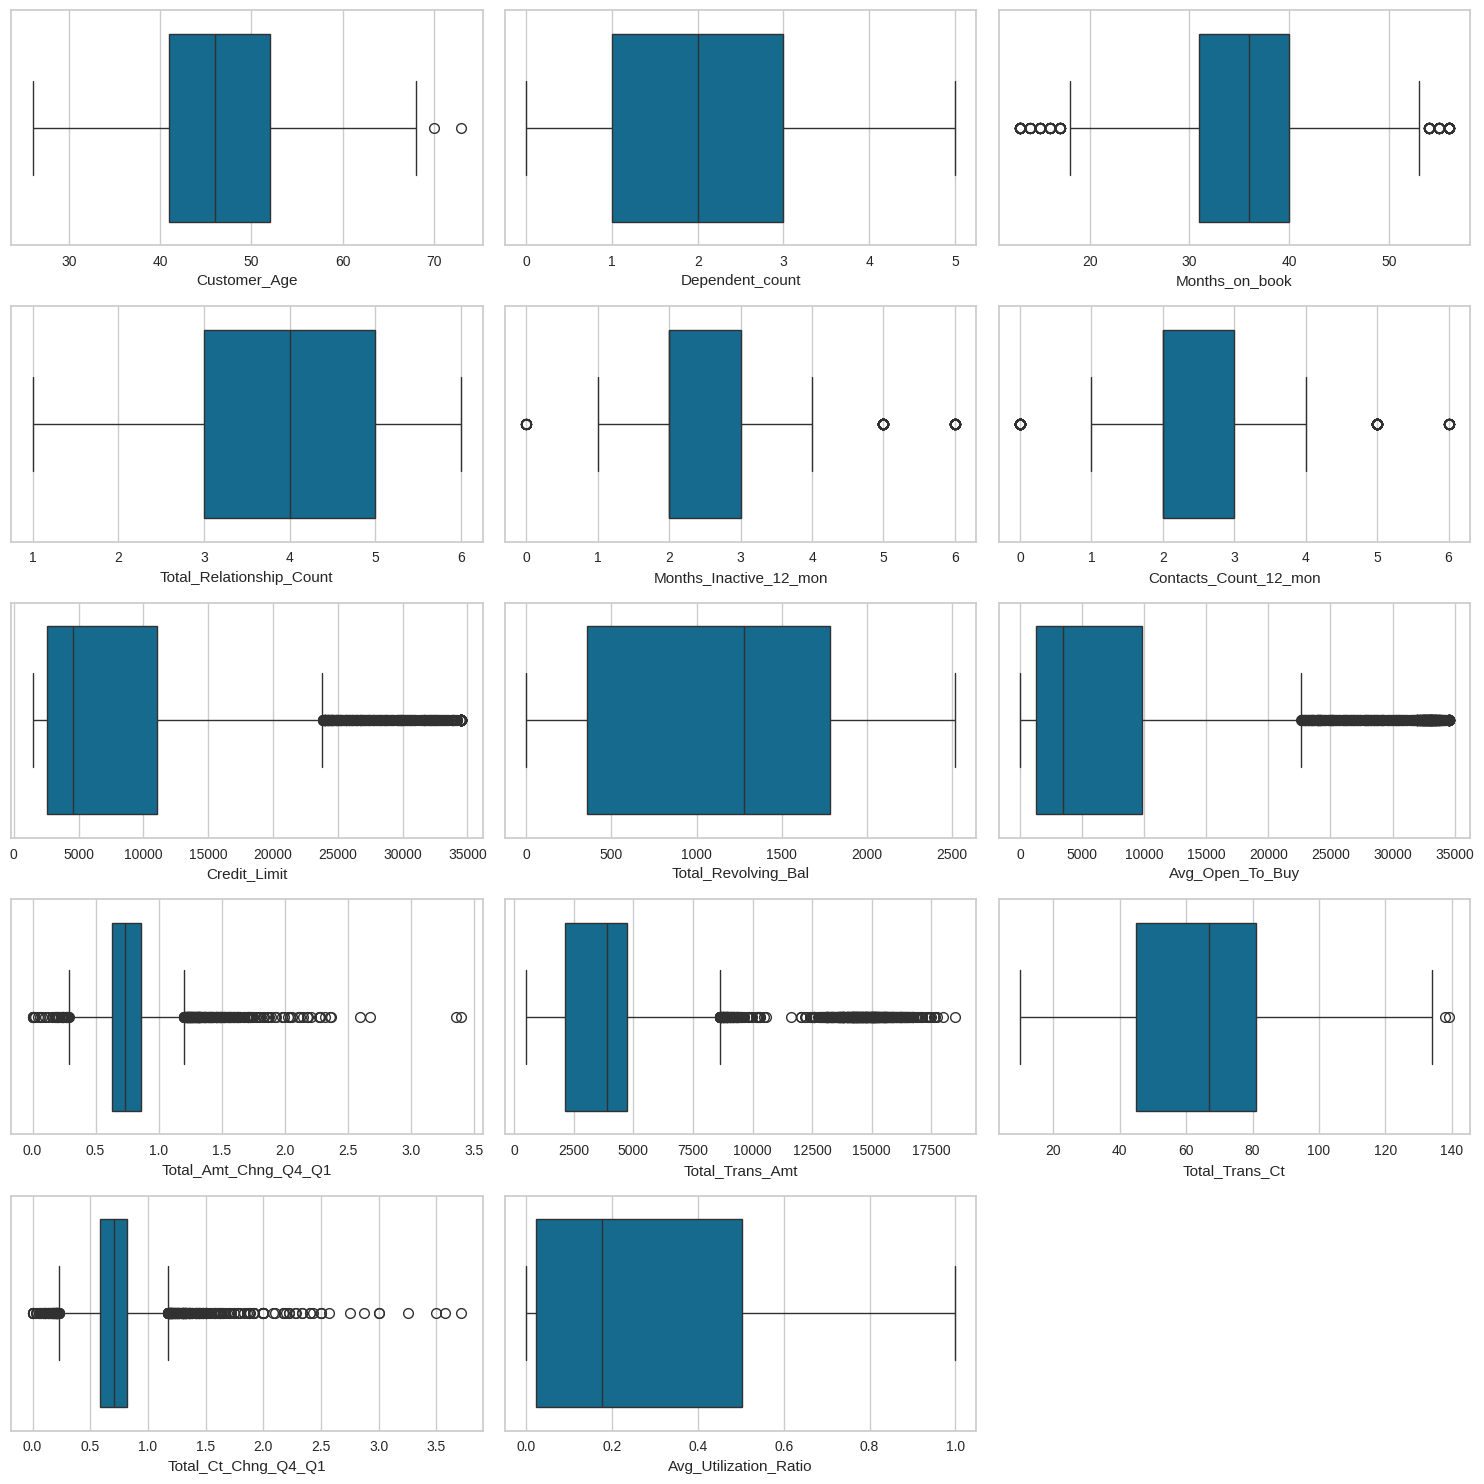

In [ ]:
# Plotting boxplot on all numeric columns that are meaningful
# This will provide insights on the distribution, IQR & outliers of the data
plotCharts(numeric_features, 15, 15, 5, 3, lambda variable: sns.boxplot(data=df, x=variable))

### Categorical Features - CountPlot

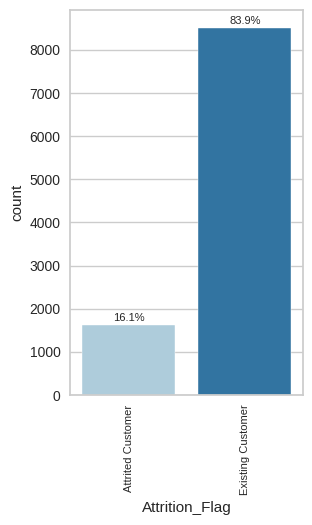

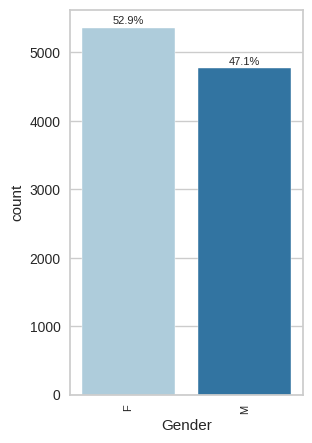

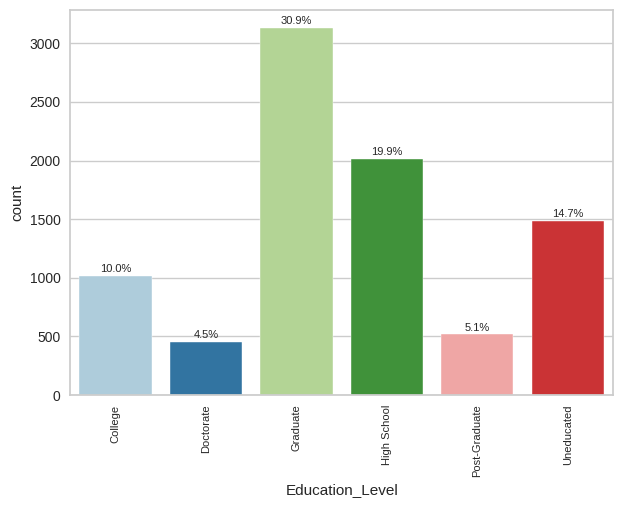

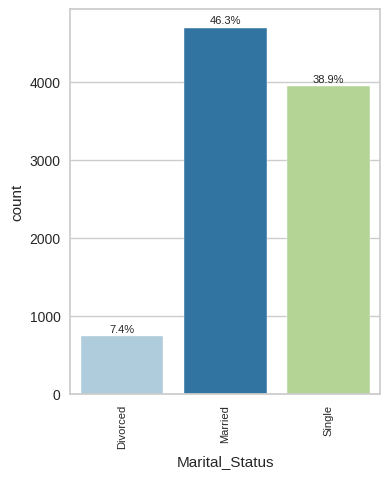

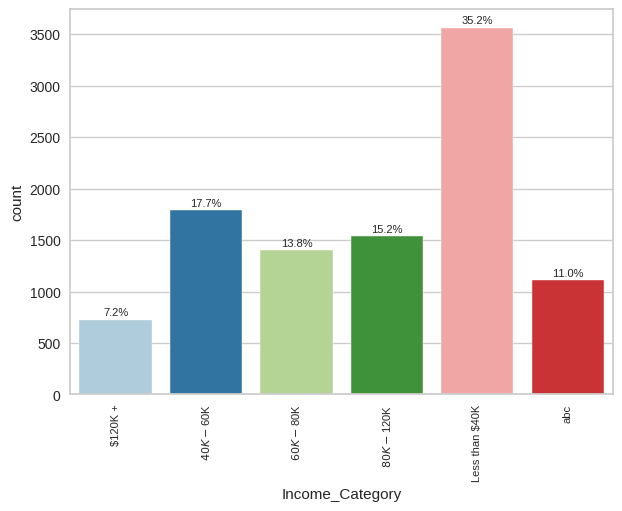

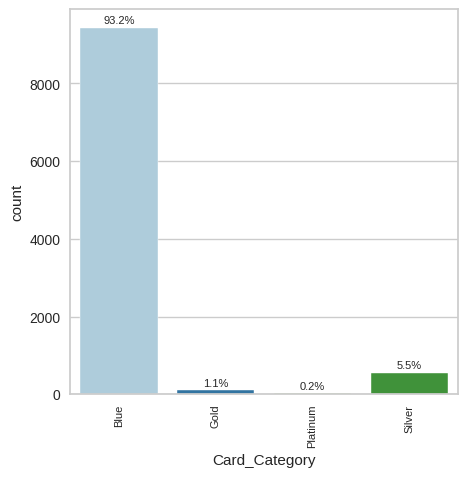

In [ ]:
# For all categorical features get the count charted
for feature in categorical_features:
    labeled_barplot(data, feature, perc=True)

### Numerical Features vs Target

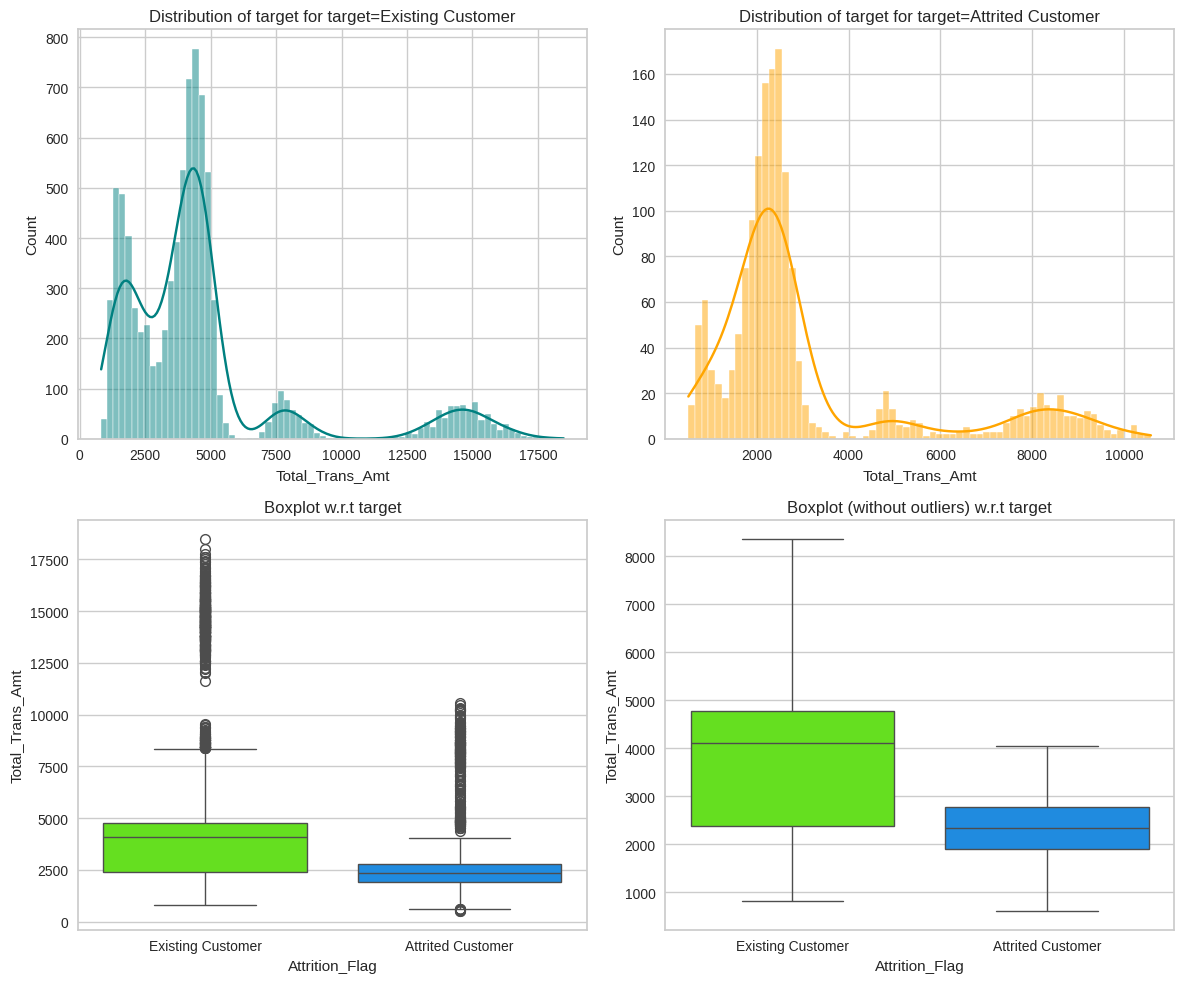

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

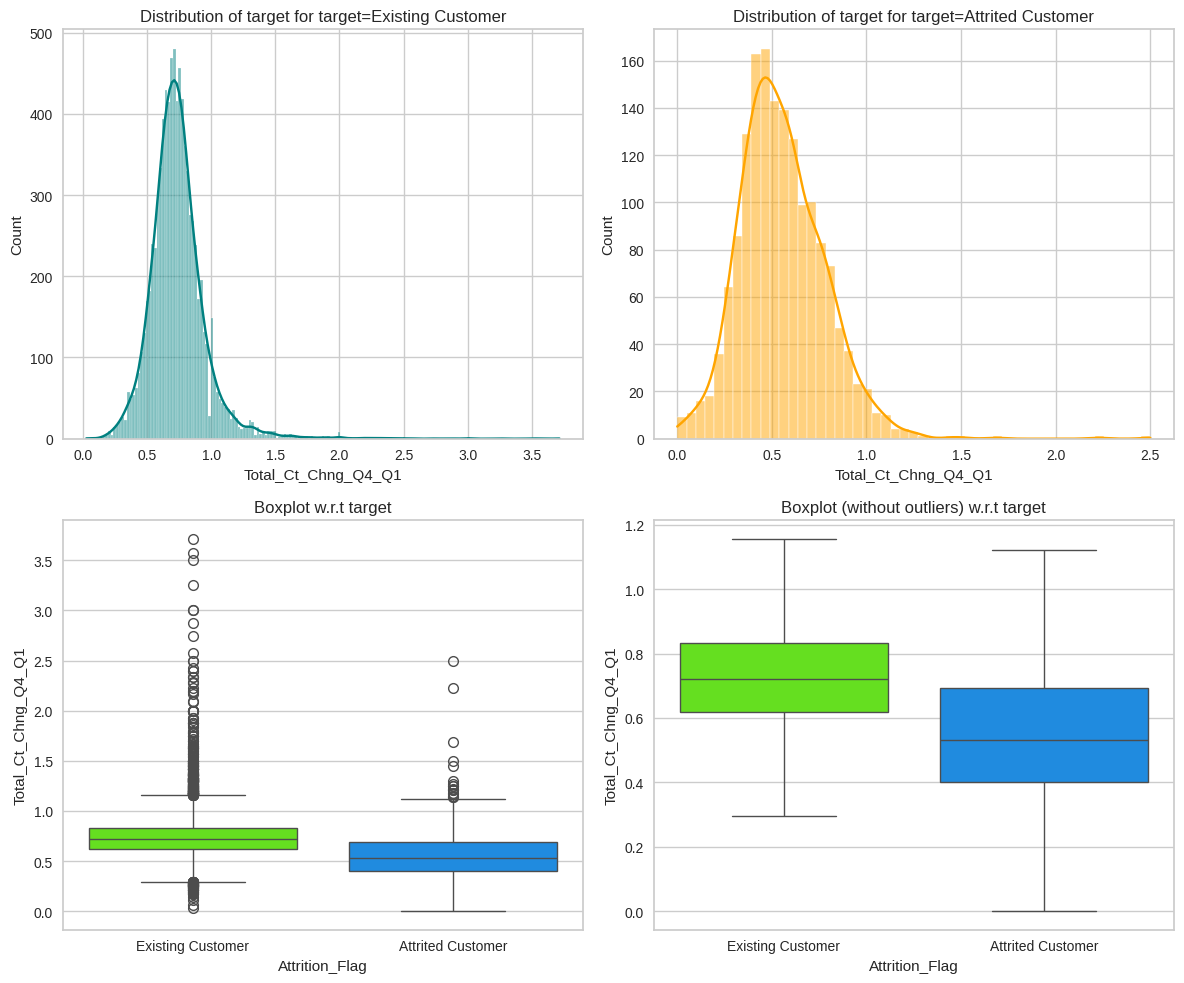

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

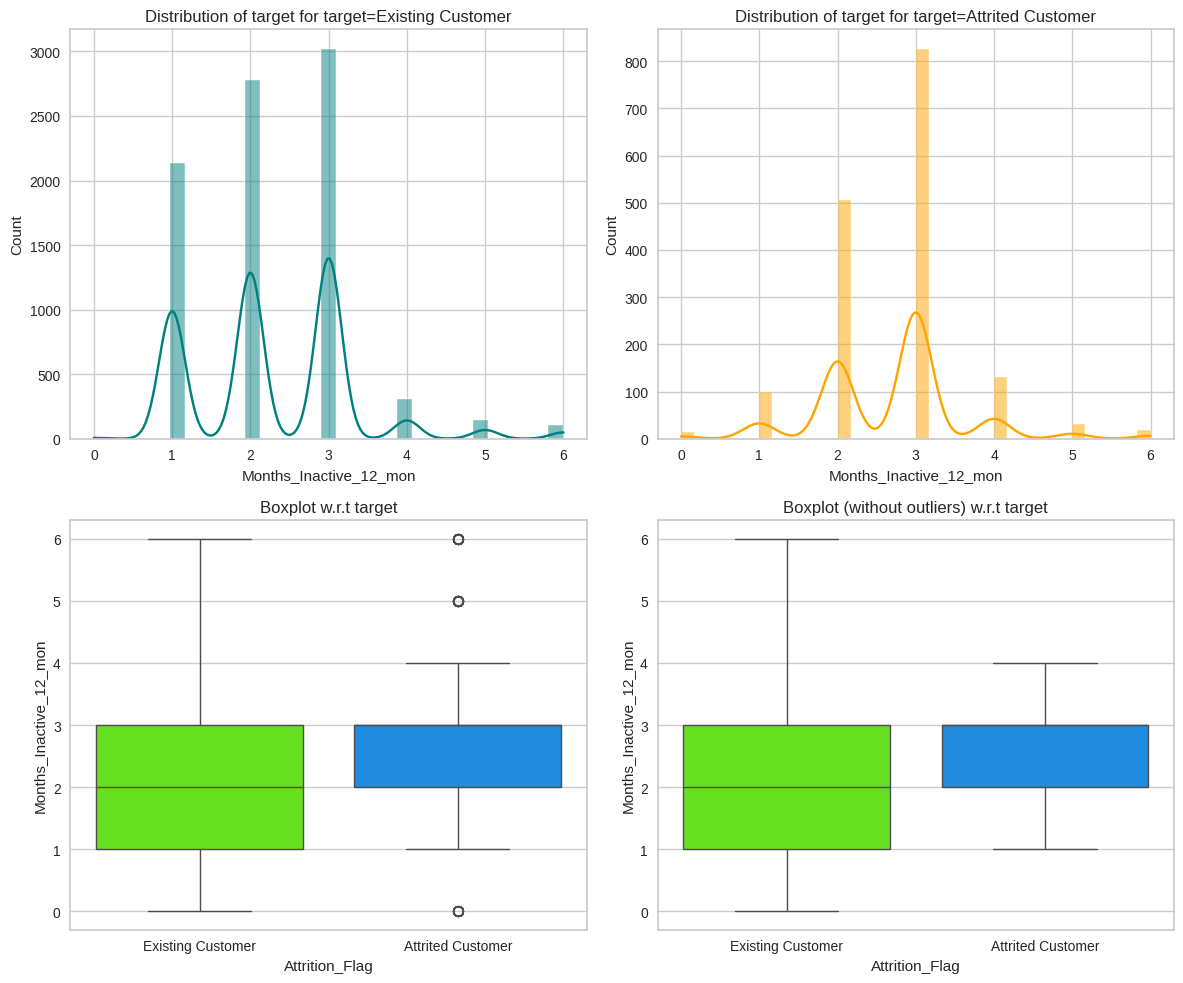

In [ ]:
distribution_plot_wrt_target(data, "Months_Inactive_12_mon", "Attrition_Flag")

### Categorical Features vs Target

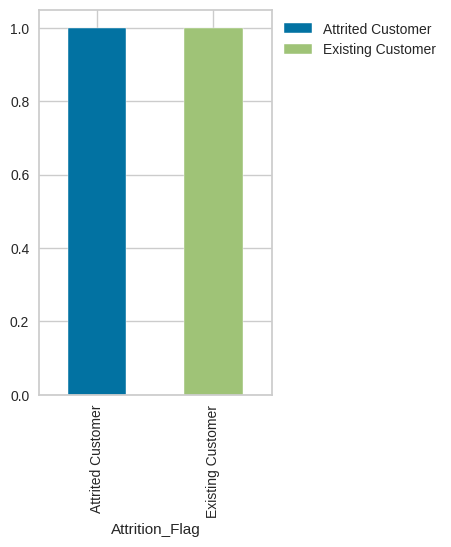

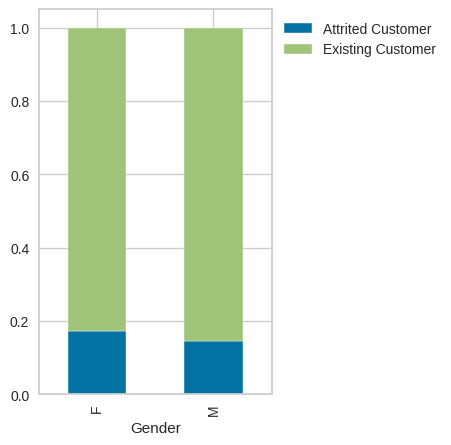

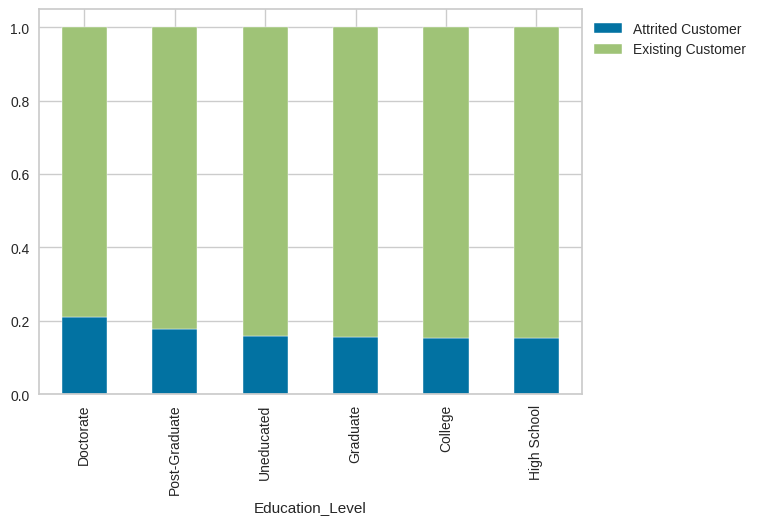

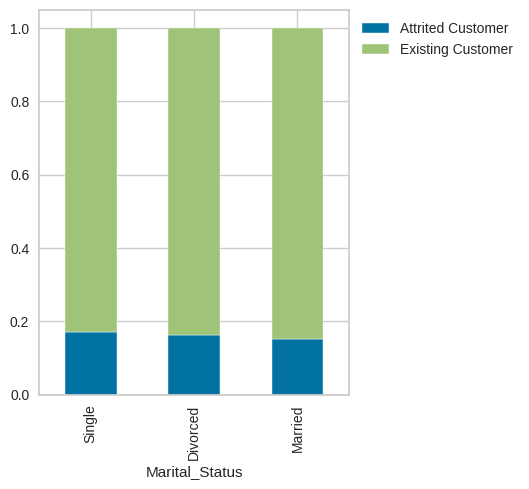

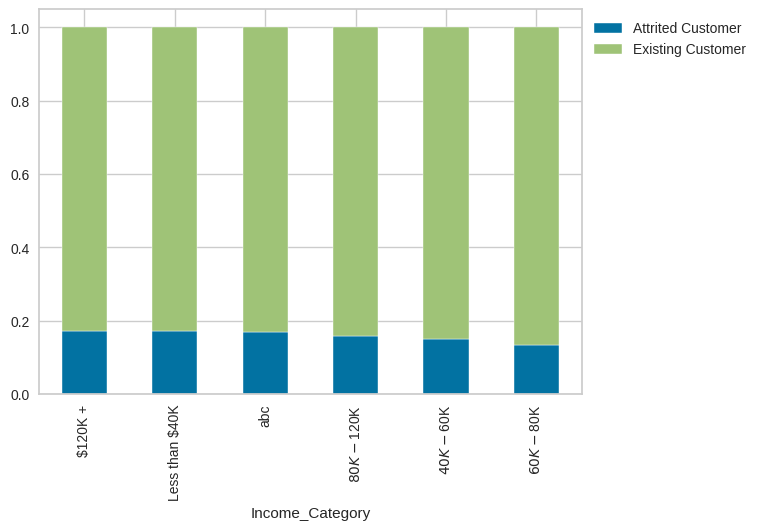

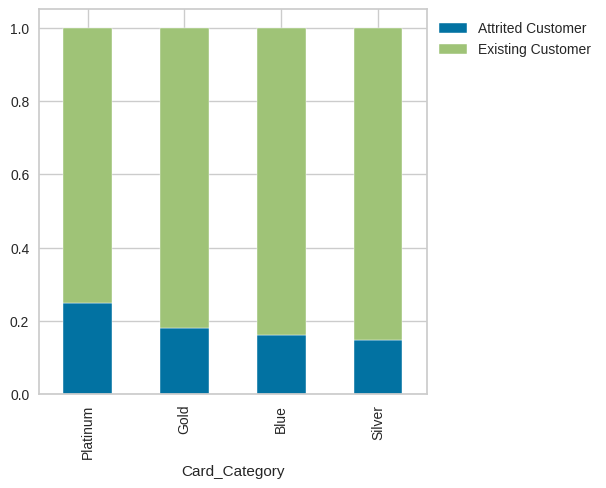

In [ ]:
for feature in categorical_features:
    stacked_barplot(df, feature, 'Attrition_Flag')

## Data Pre-processing

### Feature Engineering

#### Summary
- No duplicates
- Encode all categorical columns with numeric value
- Age is binned under 6 range bins called Age_Group
- Customer_Age is dropped as the group is created


In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Encode all categorical columns with numeric

attrition_flag = {
"Existing Customer": 0,
"Attrited Customer": 1
}
df["Attrition_Flag"] = df["Attrition_Flag"].map(attrition_flag)


gender = {
"M": 0,
"F": 1
}
df["Gender"] = df["Gender"].map(gender)

education_level = {
"Uneducated": 0,
"High School": 1,
"College": 2,
"Graduate": 3,
"Post-Graduate": 4,
"Doctorate": 5
}
df["Education_Level"] = df["Education_Level"].map(education_level)

marital_status = {
"Single": 0,
"Married": 1,
"Divorced": 2
}
df["Marital_Status"] = df["Marital_Status"].map(marital_status)

df['Income_Category'] = df['Income_Category'].replace('abc', 'Unknown')

income_category = {
"Less than $40K": 0,
"$40K - $60K": 1,
"$60K - $80K": 2,
"$80K - $120K": 3,
"$120K +": 4,
"Unknown": 5
}
df["Income_Category"] = df["Income_Category"].map(income_category)

card_category = {
"Blue": 0,
"Silver": 1,
"Gold": 2,
"Platinum": 3
}
df["Card_Category"] = df["Card_Category"].map(card_category)


# Define age bins and labels
bins = [20, 29, 39, 49, 59, 69, 79]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create the Age_Group column
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)

age_group = {
"20-29": 0,
"30-39": 1,
"40-49": 2,
"50-59": 3,
"60-69": 4,
"70-79": 5
}
df["Age_Group"] = df["Age_Group"].map(age_group)


In [ ]:
# Convert all mapped columns to a categorical data type
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')
df['Age_Group'] = df['Age_Group'].astype('category')

In [ ]:
# Remove Customer_Age as its unique id and doesnt add much value
df.drop(["Customer_Age"], axis=1, inplace=True)

In [ ]:
df['Age_Group'].value_counts()

Age_Group
2    4399
3    3336
1    1564
4     687
0     139
5       2
Name: count, dtype: int64

In [ ]:
df.sample(n=10, random_state=1)

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
6498,0,1,2,3.000,1.000,0,0,36,6,3,2,2570.000,2107,463.000,0.651,4058,83,0.766,0.820,2
9013,0,1,1,2.000,NaN,0,0,32,2,3,3,2609.000,1259,1350.000,0.871,8677,96,0.627,0.483,1
2053,0,0,2,2.000,1.000,2,0,31,6,3,2,9871.000,1061,8810.000,0.545,1683,34,0.478,0.107,2
3211,0,0,4,3.000,1.000,4,0,32,6,3,4,34516.000,2517,31999.000,0.765,4228,83,0.596,0.073,2
5559,1,1,2,5.000,1.000,0,0,28,5,2,4,1614.000,0,1614.000,0.609,2437,46,0.438,0.000,1
6106,0,0,3,4.000,0.000,3,1,42,3,1,2,34516.000,2488,32028.000,0.552,4401,87,0.776,0.072,3
4150,1,1,3,3.000,0.000,1,0,40,6,3,2,1625.000,0,1625.000,0.689,2314,43,0.433,0.000,3
2205,0,0,4,3.000,1.000,1,0,27,6,2,4,5535.000,1276,4259.000,0.636,1764,38,0.900,0.231,1
4145,0,0,1,3.000,0.000,2,1,31,4,3,3,25824.000,1170,24654.000,0.684,3101,73,0.780,0.045,2
5324,1,1,1,5.000,0.000,5,0,46,6,4,3,1970.000,1477,493.000,0.662,2493,44,0.571,0.750,3


### Data Preparation for Modeling

#### Summary
- Split data into train, val and test datasets
- Number of rows each are 6075, 2026, 2026 respectively



In [ ]:
# Prepare X without target variable and y with target variable
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


### Missing value imputation (No data leakage)




#### Summary
- **Missing value imputation done after splitting the data into train, test and validation to avoid data leakage**
- 2 categorical fieds had missing values
- `Education_Level` and `Marital_Status` both can be imputed using most frequent values from those columns
- Finally taining, validation and test data doesnt have any missing values
- SimpleImputer is used in imputing values

In [ ]:
# Check for missing values

df.isnull().sum()

Attrition_Flag                 0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Age_Group                      0
dtype: int64

In [ ]:
# Check the datatypes of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Gender                    10127 non-null  category
 2   Dependent_count           10127 non-null  int64   
 3   Education_Level           8608 non-null   category
 4   Marital_Status            9378 non-null   category
 5   Income_Category           10127 non-null  category
 6   Card_Category             10127 non-null  category
 7   Months_on_book            10127 non-null  int64   
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Credit_Limit              10127 non-null  float64 
 12  Total_Revolving_Bal       10127 non-null  int64   
 13  Avg_Open_To_Buy           10127 non-null  floa

In [ ]:
# Print all category columns

cat_cols = list(X_train.select_dtypes(include='category').columns)
print(cat_cols)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Age_Group']


In [ ]:
# Get list of categorical and numerical columns

cat_cols = list(X_train.select_dtypes(include='category').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)
print(cat_cols)
print(num_cols)

# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = cat_imputer.transform(X_val[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Age_Group']
['Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Age_Group                   0
dtype: int64
------------------------------
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy           

### One Hot Encoding

#### Summary
- Before encoding there were below records & features
  - training (6075, 19)  
  - validation (2026, 19)
  - test (2026, 19)

- Several categorical features are present like Education_Level, Marital_status, Income_Category, etc.
- All those are one hot encoded

- After encoding there are below records & features in each split
  - training (6075, 34)
  - validation (2026, 34)
  - test (2026, 34)

In [ ]:
# Do one hot encoding on all the train, validation and test datasets

X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 34) (2026, 34) (2026, 33)


In [ ]:
# Since test data has one column less due to the age group missing
# Lets fill value for that missing age group as False

X_test = X_test.reindex(columns=X_train.columns, fill_value=False)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 34) (2026, 34) (2026, 34)


In [ ]:
# Sample with one hot encoded data

X_train.sample(n=10, random_state=1)

,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_1.0,Education_Level_1.0,Education_Level_2.0,Education_Level_3.0,Education_Level_4.0,Education_Level_5.0,Marital_Status_1.0,Marital_Status_2.0,Income_Category_1.0,Income_Category_2.0,Income_Category_3.0,Income_Category_4.0,Income_Category_5.0,Card_Category_1.0,Card_Category_2.0,Card_Category_3.0,Age_Group_1.0,Age_Group_2.0,Age_Group_3.0,Age_Group_4.0,Age_Group_5.0
2177,3.000,23.000,5.000,3.000,3.000,2263.000,1794.000,469.000,0.794,2154.000,37.000,0.542,0.793,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3879,1.000,36.000,6.000,4.000,1.000,3050.000,1824.000,1226.000,0.771,1973.000,50.000,1.381,0.598,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6166,2.000,36.000,3.000,1.000,3.000,3046.000,1231.000,1815.000,0.692,4711.000,77.000,0.878,0.404,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
9909,3.000,43.000,4.000,3.000,4.000,34516.000,1084.000,33432.000,0.686,14319.000,124.000,0.699,0.031,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
10074,2.000,40.000,4.000,3.000,3.000,17655.000,1720.000,15935.000,0.706,16293.000,120.000,0.739,0.097,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
5066,4.000,32.000,6.000,3.000,4.000,1438.300,170.000,1268.300,0.889,2527.000,45.000,0.406,0.118,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
7691,5.000,37.000,4.000,2.000,1.000,2607.000,1702.000,905.000,0.802,4949.000,74.000,0.762,0.653,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
7978,2.000,45.000,2.000,2.000,2.000,4621.000,913.000,3708.000,0.917,4952.000,82.000,0.745,0.198,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
9902,3.000,36.000,4.000,1.000,2.000,5611.000,0.000,5611.000,0.697,16557.000,120.000,0.622,0.000,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
9402,4.000,26.000,2.000,2.000,2.000,32056.000,1668.000,30388.000,0.771,12595.000,106.000,0.683,0.052,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False


In [ ]:
# Print all columns after the encoding

all_cols = X_test.columns.tolist()
print(len(all_cols))
all_cols

34


['Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Gender_1.0',
 'Education_Level_1.0',
 'Education_Level_2.0',
 'Education_Level_3.0',
 'Education_Level_4.0',
 'Education_Level_5.0',
 'Marital_Status_1.0',
 'Marital_Status_2.0',
 'Income_Category_1.0',
 'Income_Category_2.0',
 'Income_Category_3.0',
 'Income_Category_4.0',
 'Income_Category_5.0',
 'Card_Category_1.0',
 'Card_Category_2.0',
 'Card_Category_3.0',
 'Age_Group_1.0',
 'Age_Group_2.0',
 'Age_Group_3.0',
 'Age_Group_4.0',
 'Age_Group_5.0']

## Model Building

### Model evaluation criterion

#### Summary
- This is a typical classification problem
- Hence will leverage below 5 Classifier algorithms and try to evaluate all of them with different criterions and then find the best out of them.
  - Bagging
  - Random Forest
  - Gradient Boosting
  - AdaBoost
  - Decision Tree

#### Function Definition - Build & Run 5 Models

**Let's define a function to run different models like Bagging, RandomForest, GBM, Adaboost and DecistionTree with default hyper params against given training and validation dataset. Stores the recall score and difference in recall score between training and validation data. Return the result collected in dictionary.**

In [ ]:
def build_run_all_models_default_hyper_param(X_train, y_train, X_val, y_val):
  models = []  # Empty list to store all the models

  # Appending models into the list
  models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
  models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
  models.append(("GBM", GradientBoostingClassifier(random_state=1)))
  models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
  models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

  res = {}
  res["training"] = {}
  res["validation"] = {}
  res["difference"] = {}

  for name, model in models:
      model.fit(X_train, y_train)
      scores_train = recall_score(y_train, model.predict(X_train))
      scores_val = recall_score(y_val, model.predict(X_val))
      differences = scores_train - scores_val
      res["training"][name] = scores_train
      res["validation"][name] = scores_val
      res["difference"][name] = differences
      # print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))

  return res

#### Function Definition - Classification Model Performance

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

#### Summary
- Original data we got after feature engineering, imputation and one hot encoding
- Use that data to run all Classifier models using function we defined before
- Based on the result
  - Adaboost seems to be better performing
  - Next best performance is from GradientBoosting (GBM)

In [ ]:
model_perf_original_data = build_run_all_models_default_hyper_param(X_train, y_train, X_val, y_val)

print("Model performance on original data  : \n", json.dumps(model_perf_original_data, indent=4))

Model performance on original data  : 
 {
    "training": {
        "Bagging": 0.9795081967213115,
        "Random forest": 1.0,
        "GBM": 0.8729508196721312,
        "Adaboost": 0.8340163934426229,
        "dtree": 1.0
    },
    "validation": {
        "Bagging": 0.7515337423312883,
        "Random forest": 0.7085889570552147,
        "GBM": 0.8558282208588958,
        "Adaboost": 0.8251533742331288,
        "dtree": 0.7914110429447853
    },
    "difference": {
        "Bagging": 0.22797445439002317,
        "Random forest": 0.29141104294478526,
        "GBM": 0.017122598813235412,
        "Adaboost": 0.00886301920949406,
        "dtree": 0.20858895705521474
    }
}


### Model Building with Oversampled data


#### Summary
- Oversample data
  - Apply a simple SMOTE strategy to oversample data to increase the ratio of minority classes of target variable
  - Before oversampling 976 records where there on 'Yes' category for target variable
  - After oversampling both are evaluated to have 5099
  
- Use that data to run all Classifier models using function we defined before
- Based on the result
  - Adaboost seems to be better performing
  - Next best performance is from GradientBoosting (GBM)

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 34)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
model_perf_oversampled_data = build_run_all_models_default_hyper_param(X_train_over, y_train_over, X_val, y_val)

print("Model performance on oversampled training data  : \n", json.dumps(model_perf_oversampled_data, indent=4))

Model performance on oversampled training data  : 
 {
    "training": {
        "Bagging": 0.9982349480290253,
        "Random forest": 1.0,
        "GBM": 0.9794077270052951,
        "Adaboost": 0.9664640125514807,
        "dtree": 1.0
    },
    "validation": {
        "Bagging": 0.843558282208589,
        "Random forest": 0.8343558282208589,
        "GBM": 0.8803680981595092,
        "Adaboost": 0.8711656441717791,
        "dtree": 0.8159509202453987
    },
    "difference": {
        "Bagging": 0.15467666582043638,
        "Random forest": 0.16564417177914115,
        "GBM": 0.09903962884578588,
        "Adaboost": 0.09529836837970163,
        "dtree": 0.18404907975460127
    }
}


### Model Building with Undersampled data

#### Summary
- Undersample data
  - Apply a Random UnderSampler strategy to undersample data to decrease the ratio of majority classes of target variable
  - Before undersampling 5099 records where there on 'No' category for target variable
  - After undersampling both are evaluated to have 976
  - Total records are down to 1952 from ~10k
  
- Use that data to run all Classifier models using function we defined before
- Based on the result
  - Adaboost seems to be better overfitting
  - Best performance seems to be GBM
  - Next best performance is from Bagging

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 34)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
model_perf_undersampled_data = build_run_all_models_default_hyper_param(X_train_un, y_train_un, X_val, y_val)

print("Model performance on undersampled training data  : \n", json.dumps(model_perf_undersampled_data, indent=4))

Model performance on undersampled training data  : 
 {
    "training": {
        "Bagging": 0.9907786885245902,
        "Random forest": 1.0,
        "GBM": 0.9805327868852459,
        "Adaboost": 0.9538934426229508,
        "dtree": 1.0
    },
    "validation": {
        "Bagging": 0.9294478527607362,
        "Random forest": 0.9263803680981595,
        "GBM": 0.9539877300613497,
        "Adaboost": 0.9662576687116564,
        "dtree": 0.911042944785276
    },
    "difference": {
        "Bagging": 0.06133083576385401,
        "Random forest": 0.07361963190184051,
        "GBM": 0.026545056823896185,
        "Adaboost": -0.012364226088705577,
        "dtree": 0.08895705521472397
    }
}


### Model Performance Comparison and Observation

#### Summary
- Comparing the original, oversample and undersampled result
- 15 models were built totally
- GBM and Adaboost are performing well with all 3 different datasets will **low difference values of recall score between training & validation dataset**
- We will further pick these `top 3 performant` models and data combination and evaluate the performance again
  - AdaBoost with original data (diff=0.009)
  - GBM with original data (diff=0.017)
  - GBM with undersampled data (diff=0.027)

In [ ]:
# Create DataFrames for each dictionary
df_original = pd.DataFrame(model_perf_original_data['difference'].values(),index=model_perf_original_data['difference'].keys())
df_oversample = pd.DataFrame(model_perf_oversampled_data['difference'].values(), index=model_perf_oversampled_data['difference'].keys())
df_undersample = pd.DataFrame(model_perf_undersampled_data['difference'].values(), index=model_perf_undersampled_data['difference'].keys())

# Combine the DataFrames
df_combined = pd.concat([df_original, df_oversample, df_undersample], axis=1)
df_combined.columns = ['Original_Diff', 'Oversample_Diff', 'Undersample_Diff']

df_combined

,Original_Diff,Oversample_Diff,Undersample_Diff
Bagging,0.228,0.155,0.061
Random forest,0.291,0.166,0.074
GBM,0.017,0.099,0.027
Adaboost,0.009,0.095,-0.012
dtree,0.209,0.184,0.089


### HyperparameterTuning

#### Summary
- AdaBoostClassifier is tuned with
  - range of estimators & learning rate
  - base estimators having max_depth of 2 and 3
- GradientBoostingClassifier is tuned with
  - AdaBoost and DecisionTree
  - range of estimators, learning rates
  - selection of subsamples and max_features
- Overall time took for each model hyper tuning with `RandomSearch` CrossValidation
  - (adb) AdaBoost with original data took `1.5 mins`
  - (gbm1) GBM with original data took `2.45 mins`
  - (gbm2) GBM with undersampled data took `1.12 mins`
- We also stored the models' performance including recall, precision, accuracy, etc for comparison

#### Sample tuning method for AdaBoostClassifier with original data (Difff=0.009)

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8309314495028781:
CPU times: user 5.24 s, sys: 303 ms, total: 5.54 s
Wall time: 2min 3s


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.951,0.912,0.990,0.949


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.971,0.874,0.944,0.908


#### Sample tuning method for GradientBoostingModel tree with original data (Diff=0.017)

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7991784406070119:
CPU times: user 4.47 s, sys: 427 ms, total: 4.9 s
Wall time: 2min 56s


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train, y_train
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.973,0.873,0.954,0.912


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.968,0.859,0.940,0.897


#### Sample tuning method for GradientBoostingModel tree with undersampled data (Diff=0.027)

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.95287284144427:
CPU times: user 2.52 s, sys: 191 ms, total: 2.71 s
Wall time: 1min 20s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=75,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(
    tuned_gbm2, X_train_un, y_train_un
)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.968,0.977,0.960,0.969


In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.933,0.960,0.720,0.823


## Model Comparison and Final Model Selection

#### Summary
- Comparing below 3 model performances against training data and validation data
  - (adb) AdaBoost with original data
  - (gbm1) GBM with original data
  - (gbm2) GBM with undersampled data
- GBM1 with original data has compartively good recall and precision when compared to other 2 models
- GBM2 with undersampled data dropped in precision with validation data
- Second best is AdaBoost with original data
- That makes sense as GBM1 also used AdaBoost as the best classifier after RandomSearch cross validation

**Final Model**
- Hyer tuned GradienBoost with original data (gbm1)

**Final Model against Test dataset**
- Test set has never influenced the model performance tuning
- GBM1 is evaluated with test dataset (shown below)
- Evaluated GBM2 (in the background, not shown below) as well with **unseen** test dataset
- Results

| Performance Metrics | GBM1 | GBM2 |
| :---------------- | :------: | ----: |
| Accuracy        |   0.966   | 0.932 |
| Recall           |   0.846   | 0.966 |
| Precision    |  0.935   | 0.714 |
| F1 |  0.889   | 0.821 |


**Clear Winner**

> GradientBoost (with Adaboost) tuned with original dataset without oversampling or undersampling has a very good `Precision of 93.5%` and comparitively low `Recall of 84%` and very good `Accuracy of 96%`







### Compare all 3 models performance

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with UnderSampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Original data,Gradient boosting trained with UnderSampled data,AdaBoost trained with Original data
Accuracy,0.973,0.968,0.951
Recall,0.873,0.977,0.912
Precision,0.954,0.960,0.990
F1,0.912,0.969,0.949


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Original data",
    "Gradient boosting trained with UnderSampled data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Original data,Gradient boosting trained with UnderSampled data,AdaBoost trained with Original data
Accuracy,0.968,0.933,0.971
Recall,0.859,0.960,0.874
Precision,0.940,0.720,0.944
F1,0.897,0.823,0.908


### Final Model Selction & Performance - GBM1 with Test dataset

In [ ]:
# Let's check the performance on test set
final_model_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
final_model_test

,Accuracy,Recall,Precision,F1
0,0.966,0.846,0.935,0.889


### Feature Importances
- Total Transaction Count seems to be strong influencer
- Below are the important features
  - Total Transaction Amount and Count Change (Last 12 months)
  - Total Revolving Balance
  - Total Transaction Amount and Count Change (Q4 over Q1)
  - Total Relationship count
  - Average Utilization Ratio

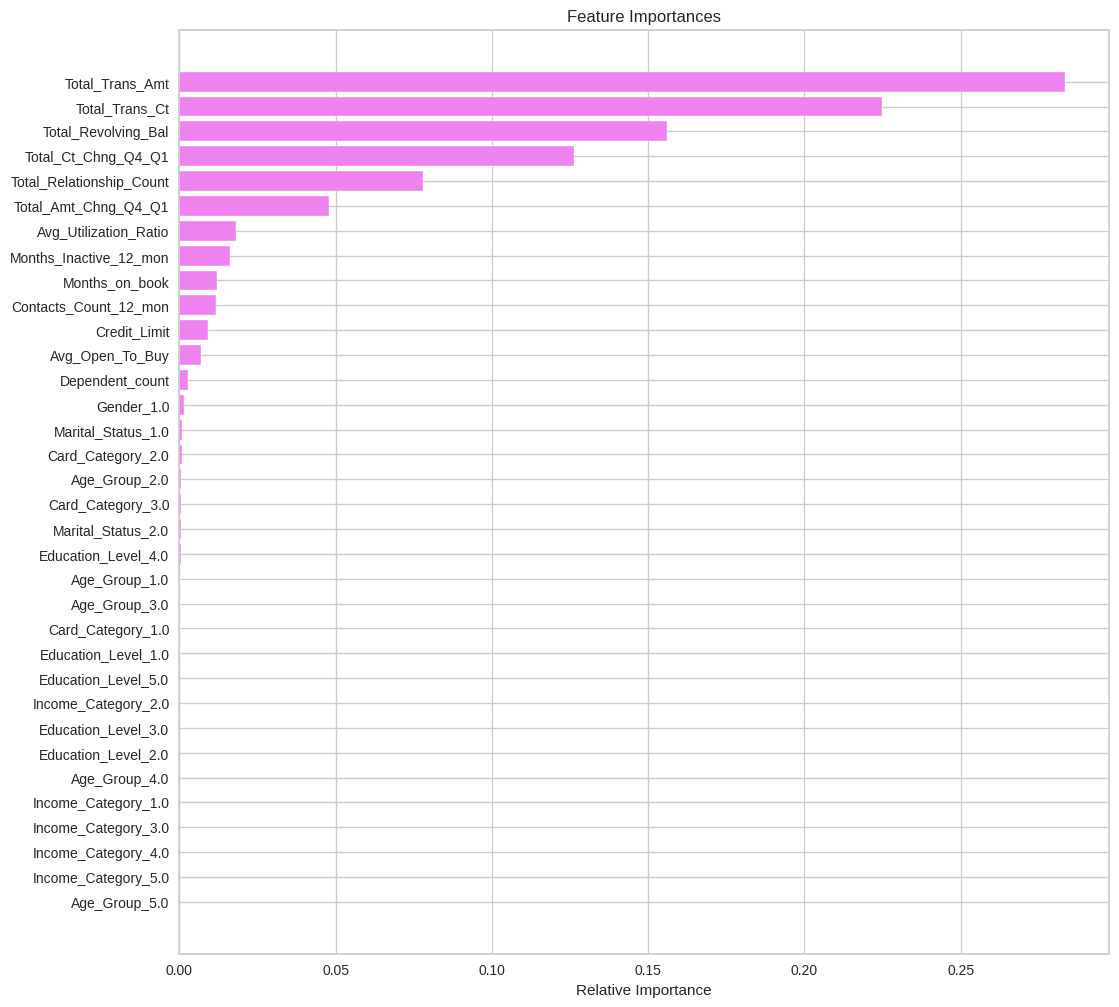

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

### Recap of Observations

- Attrited Customers

  - Tend to have significantly lower transaction amount and count
  - Also their revolving balance seems to be significant feature impacting their attrition.
  - Shows inconsistent usage behavior

- Existing Customers
  - Tend to show consitent usage behavior
  - Long term customers are mostly retained

- All Customers
  - Tend to have lower utilization when Credit Limit is higher
  - Having more products are tend to under utilize the credit card
  - Long term customers also has under utilization


#### Actionable Insights

- Marketing Campaigns

  - Target high-value customers (2000-5000) with tailored rewards.
  - Encourage higher spending for customers transacting 800-2800.

- Credit Utilization
  - Educate on improving utilization ratios.
  - Reward optimal utilization with benefits.

- Customer Relationships

  - Strengthen relationships with customers having fewer products.
  - Offer customized services for older customers.

- Data-Driven Decisions

  - Leverage positive correlations to boost transactions and credit utilization.
  - Counteract negative correlations with improved offerings.

- Model-Based Insights

  - Focus on key impacting features like Total Transaction Amount and Count Change.
  - Use predictive analytics to identify and retain at-risk customers.
  - Implement these strategies to improve retention, optimize credit use, and enhance customer satisfaction.



#### Business Recommendations

- Retention Strategies

  - Personalize campaigns for customers who are inactive for 2-3 months or transacting in the range 800-2800.
  - Send regular activity reminders or offers pertaining to cash back, etc.

- Credit Utilization

  - Adjust credit limits for underutilizing customers, so that they overall credit vs usage patter across customers are maintained.
  - Educate on maintaining a balanced utilization ratio by providing Credit Score webinars, etc.

- Product Bundling

  - Cross-sell products to customers with fewer products with promotion, so that they will become long term customers atleast in other products if they want to close account on one.
  - Offer tailored solutions for older, long-term customers.

- Transaction Monitoring

  - Provide proactive support for irregular transaction patterns by mobile notifying them or sending offers.
  - Enhance fraud detection using transaction variability insights.


**Overall the transaction monitoring, personalized campaigns, educative webinars for build credit score, custom tailored offers are all will help significantly reduce attrition and retain customers.**